In [1]:
import scipy.io as sio
import pandas as pd
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
A01 = sio.loadmat('A03.mat',squeeze_me=True)

In [2]:
df=pd.DataFrame(A01['data']['X'].tolist(),columns=A01['data']['channels'].tolist().tolist())

In [3]:
df['y_stim']=A01['data']['y_stim'].tolist().tolist()
df['P300']=A01['data']['y'].tolist().tolist()

In [4]:
b, a = signal.butter(2, [1,12], 'bandstop',fs=256)

In [5]:
# fs = 256.0  # Sample frequency (Hz)
# f0 = 50.0  # Frequency to be removed from signal (Hz)
# Q = 30.0  # Quality factor
# # Design notch filter
# b, a = signal.iirnotch(f0, Q, fs)

In [6]:
active_indexs=df[df.y_stim!=0].index.tolist()[::32]

In [7]:
target_x,notarget_x=[],[]
order_input,col_and_rows,ground_true,label_index=[],[],[],[]
begin_index,end_index=40,200
#sub_sample=20
#sub_sample_index=int((end_index-begin_index)/20)
for index in active_indexs:
    values=df.iloc[index+begin_index:index+end_index,:8].values
    #values=(values-np.mean(values,axis=0))[np.newaxis]
    values=(values-values[0])[np.newaxis]
    #values=signal.filtfilt(b, a, values,axis=0)[np.newaxis]
    order_input.append(values)
    col_and_rows.append(df.iloc[index].y_stim)
    if df.iloc[index]['P300']==1:
        notarget_x.append(values)
        label_index.append(0)
    else:
        target_x.append(values)
        ground_true.append(df.iloc[index].y_stim)
        label_index.append(1)
notarget_x=np.concatenate(notarget_x,axis=0)
target_x=np.concatenate(target_x,axis=0)
order_input=np.concatenate(order_input,axis=0)
col_and_rows=np.array(col_and_rows)
ground_true=np.array(ground_true)
label_index=np.array(label_index)

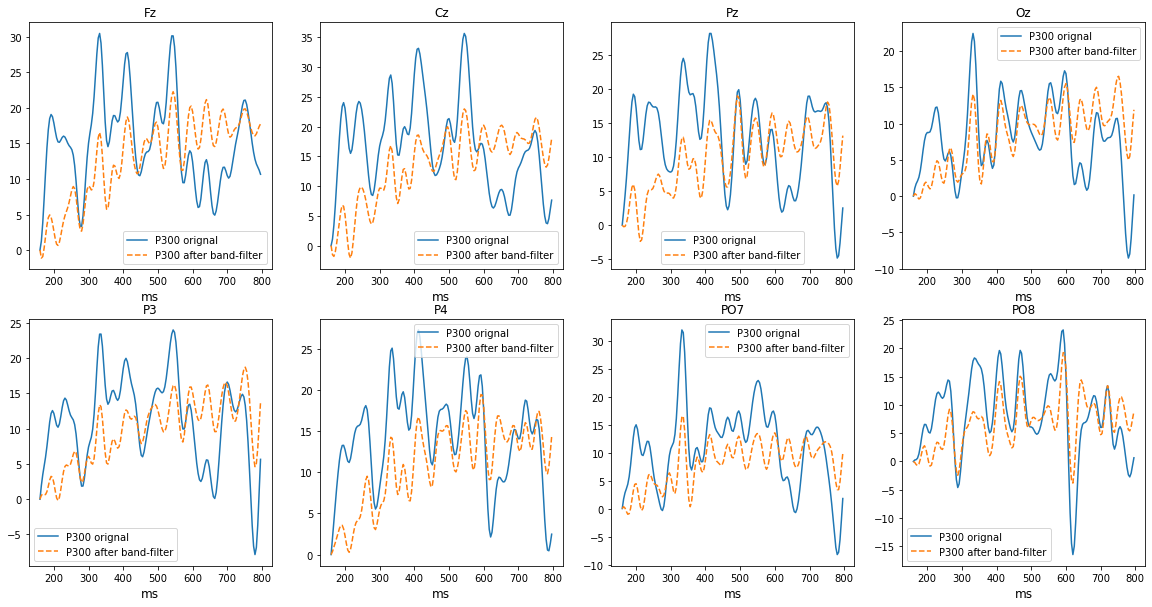

In [8]:
plt.subplots(figsize=(20,10))
chanels=A01['data']['channels'].tolist().tolist()
k=np.random.randint(20)
for j in range(1,9):
    plt.subplot(2,4,j)
    plt.plot(np.arange(begin_index,end_index)*4,target_x[k,:,j-1])
    x=signal.filtfilt(b, a, target_x[k,:,j-1],axis=0)
    plt.plot(np.arange(begin_index,end_index)*4,(x-x[0]),'--')
    plt.title(chanels[j-1],fontsize=12)
    plt.legend(['P300 orignal','P300 after band-filter'])
    plt.xlabel('ms',fontsize=12)

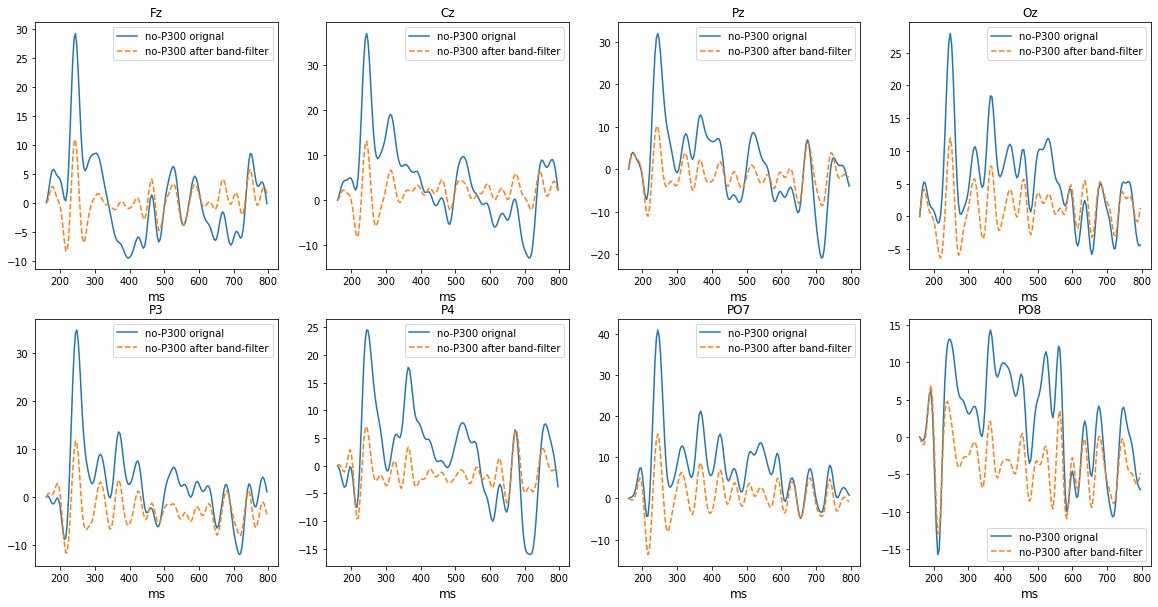

In [9]:
plt.subplots(figsize=(20,10))
chanels=A01['data']['channels'].tolist().tolist()
k=np.random.randint(20)
for j in range(1,9):
    plt.subplot(2,4,j)
    plt.plot(np.arange(begin_index,end_index)*4,notarget_x[k,:,j-1])
    x=signal.filtfilt(b, a, notarget_x[k,:,j-1],axis=0)
    plt.plot(np.arange(begin_index,end_index)*4,(x-x[0]),'--')
    plt.title(chanels[j-1],fontsize=12)
    plt.legend(['no-P300 orignal','no-P300 after band-filter'])
    plt.xlabel('ms',fontsize=12)

<AxesSubplot:>

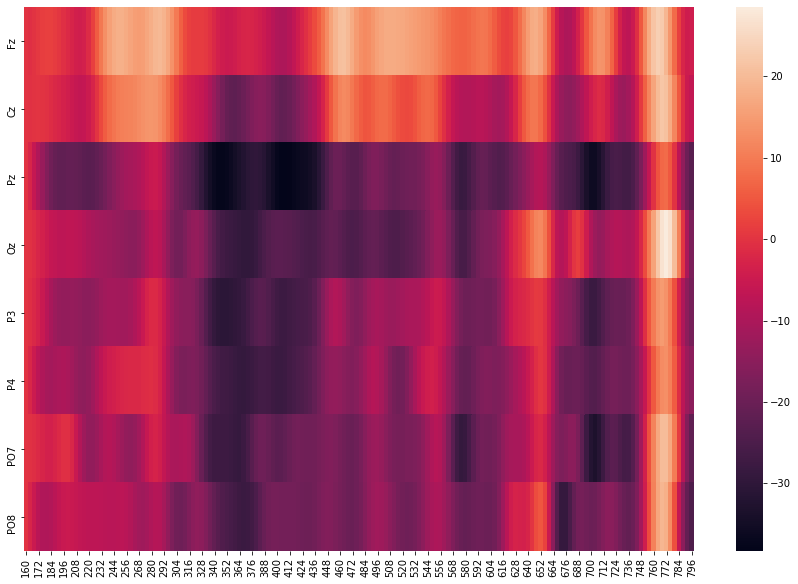

In [10]:
k=np.random.randint(len(target_x))
p300=pd.DataFrame(target_x[k].T)
p300.columns=np.arange(begin_index,end_index)*4
p300.index=A01['data']['channels'].tolist().tolist()
plt.subplots(figsize=(15,10))
sns.heatmap(p300)

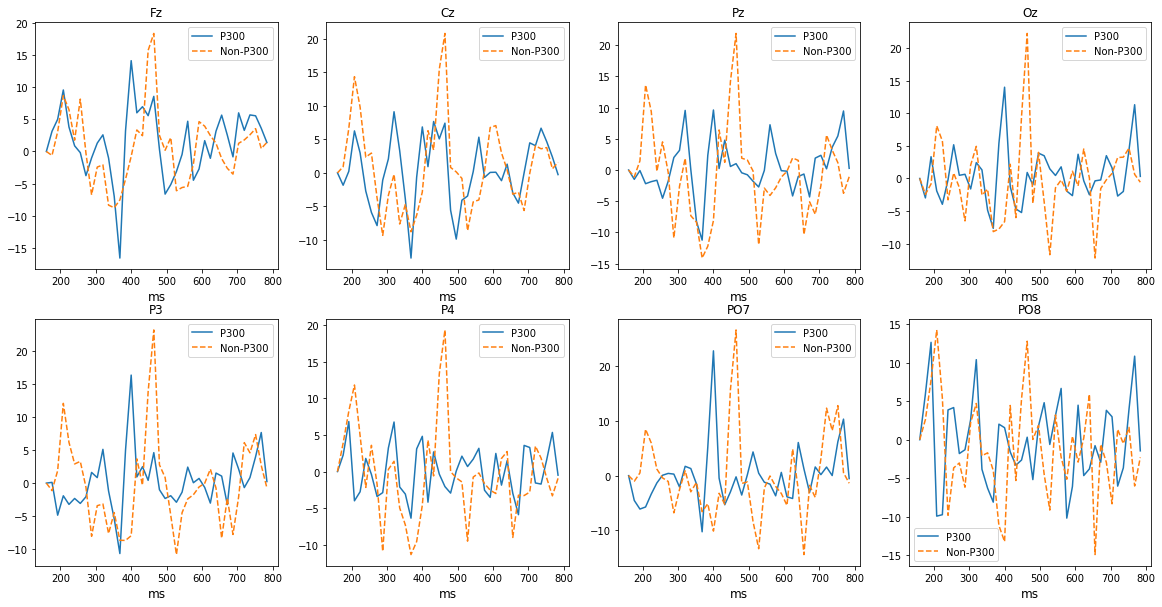

In [11]:
plt.subplots(figsize=(20,10))
chanels=A01['data']['channels'].tolist().tolist()
k=np.random.randint(20)
for j in range(1,9):
    plt.subplot(2,4,j)
    x=signal.filtfilt(b, a, target_x[k,:,j-1][::4],axis=0)
    y=signal.filtfilt(b, a, notarget_x[k,:,j-1][::4],axis=0)
    plt.plot(np.arange(begin_index/4,end_index/4)*16,(x-x[0]))
    plt.plot(np.arange(begin_index/4,end_index/4)*16,(y-y[0]),'--')
    plt.title(chanels[j-1],fontsize=12)
    plt.xlabel('ms',fontsize=12)
    plt.legend(['P300','Non-P300'])
    

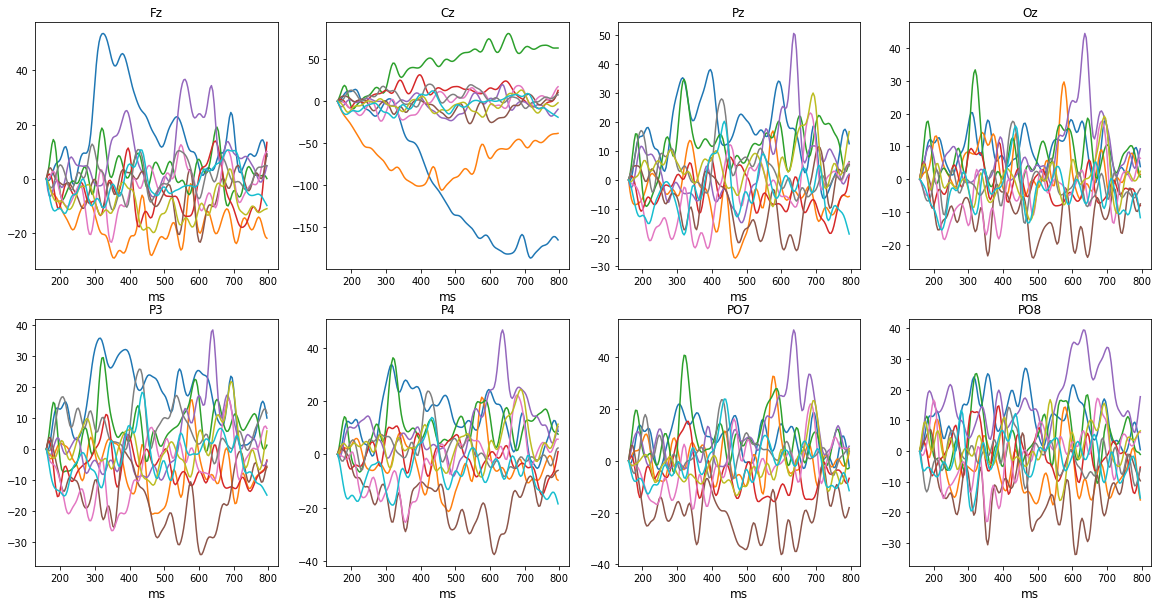

In [12]:
plt.subplots(figsize=(20,10))
chanels=A01['data']['channels'].tolist().tolist()
for j in range(1,9):
    plt.subplot(2,4,j)
    for v in range(10):
        plt.plot(np.arange(begin_index,end_index)*4,notarget_x[v,:,j-1])
    plt.title(chanels[j-1],fontsize=12)
    plt.xlabel('ms',fontsize=12)

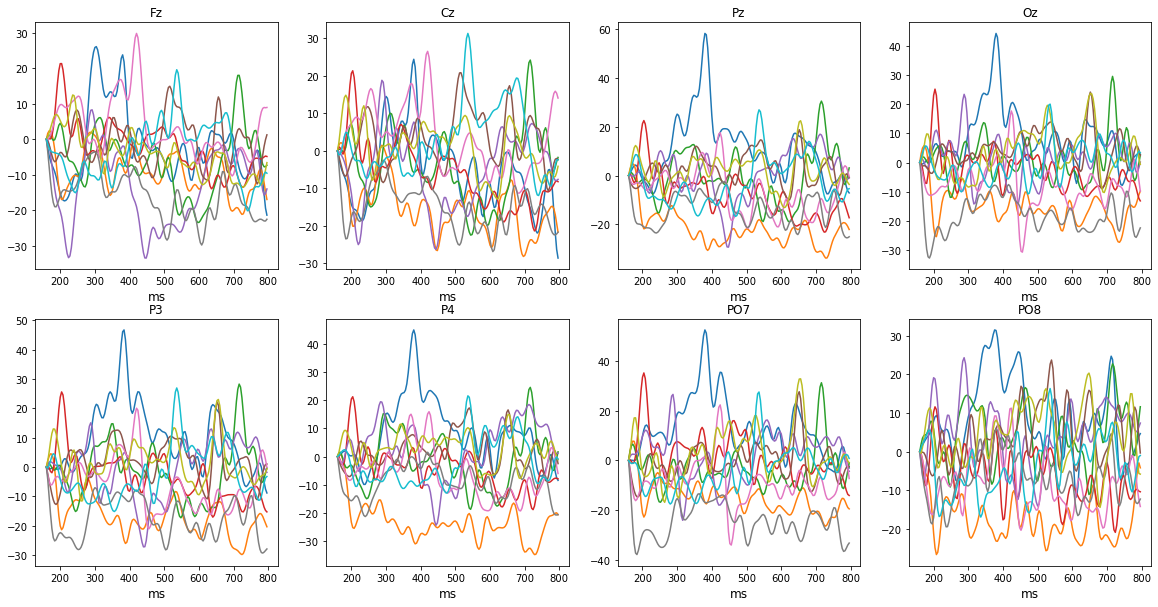

In [13]:
plt.subplots(figsize=(20,10))
chanels=A01['data']['channels'].tolist().tolist()
for j in range(1,9):
    plt.subplot(2,4,j)
    for v in range(10):
        plt.plot(np.arange(begin_index,end_index)*4,target_x[v,:,j-1])
    plt.title(chanels[j-1],fontsize=12)
    plt.xlabel('ms',fontsize=12)

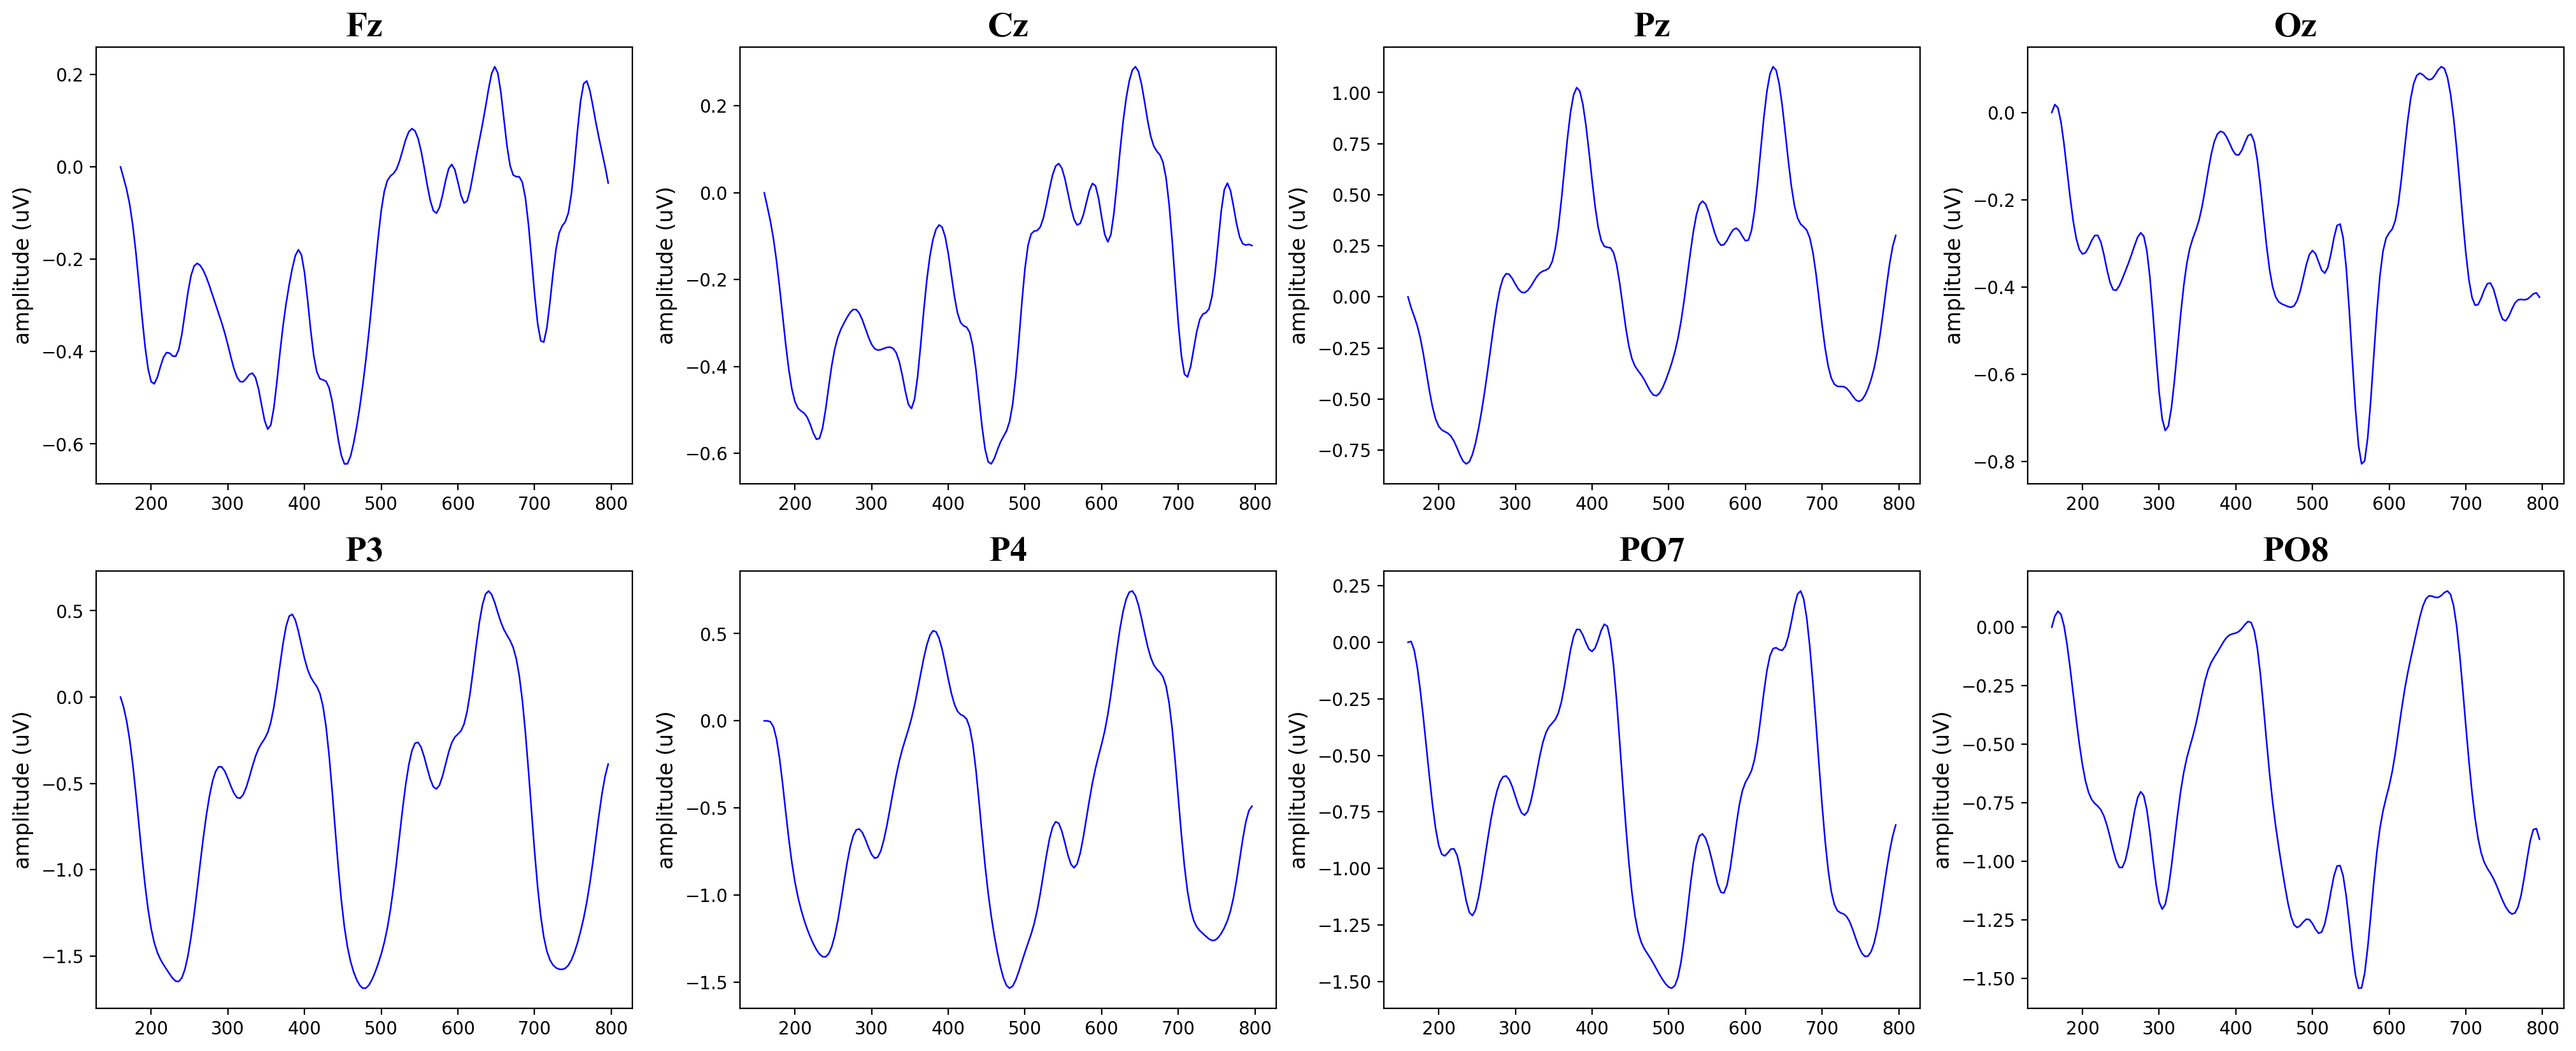

In [14]:
plt.subplots(figsize=(25,10),dpi=200)
chanels=A01['data']['channels'].tolist().tolist()
for j in range(1,9):
    plt.subplot(2,4,j)
    plt.plot(np.arange(begin_index,end_index)*4,np.mean(notarget_x[:,:,j-1],axis=0),linewidth=0.9,color='b')
    plt.title(chanels[j-1],family='Times New Roman',fontweight='bold',fontsize=20)
    #plt.xlabel('ms',fontsize=12)
    plt.ylabel('amplitude (uV)',fontsize=12)

In [15]:
P300_result=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','1','2','3','4','5','6','7','8','9','0']).reshape(6,6)
P300_Result=pd.DataFrame([P300_result][0])

In [16]:
P300_result

array([['A', 'B', 'C', 'D', 'E', 'F'],
       ['G', 'H', 'I', 'J', 'K', 'L'],
       ['M', 'N', 'O', 'P', 'Q', 'R'],
       ['S', 'T', 'U', 'V', 'W', 'X'],
       ['Y', 'Z', '1', '2', '3', '4'],
       ['5', '6', '7', '8', '9', '0']], dtype='<U1')

In [17]:
ground_col_and_rows=ground_true.reshape(-1,2).astype(int)
P300_Result.index=np.arange(1,7)
P300_Result.columns=np.arange(7,13)
Ground_true=[ P300_Result[y][x] for (x,y) in ground_col_and_rows.tolist()]

In [18]:
X=np.concatenate([target_x,notarget_x],axis=0)
X=X.reshape(len(X),-1)
y=np.zeros([len(X),1])
y[:len(target_x)]=1
y=y.ravel()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
Test_pred=clf.predict(X_test)
confusion=confusion_matrix(Test_pred,y_test)/np.sum(confusion_matrix(Test_pred,y_test))

In [22]:
print('accuarcy: %.2f'%(np.sum(np.diag(confusion))))

accuarcy: 0.83


In [23]:
confusion

array([[0.74365079, 0.0952381 ],
       [0.07698413, 0.08412698]])

In [24]:
Xtrain_new = sio.loadmat('Xtrain_new.mat',squeeze_me=True)['Xtrain_new']
Ytrain = sio.loadmat('Ytrain.mat',squeeze_me=True)['Ytrain']-1
Xtest_new = sio.loadmat('Xtest_new.mat',squeeze_me=True)['Xtest_new']
Ytest = sio.loadmat('Ytest.mat',squeeze_me=True)['Ytest']-1

In [25]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain_new, Ytrain)
Test_pred=clf.predict(Xtest_new)
confusion=confusion_matrix(Ytest,Test_pred)/np.sum(confusion_matrix(Ytest,Test_pred))

In [26]:
print('accuarcy: %.2f'%(np.sum(np.diag(confusion))))

accuarcy: 0.84


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Linear Discriminant Analysis","Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]
classifiers = [
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=500),
    AdaBoostClassifier(),
    GaussianNB(),]
acc,classifier=[],[]
X_train, X_test, y_train, y_test
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    Train_pred=clf.predict(X_train)
    Test_pred=clf.predict(X_test)
    confusion=confusion_matrix(y_train,Train_pred)/np.sum(confusion_matrix(y_train,Train_pred))
    print('model:%s  train accuarcy: %.2f'%(name,np.sum(np.diag(confusion))))
    confusion=confusion_matrix(y_test,Test_pred)/np.sum(confusion_matrix(y_test,Test_pred))
    print('model:%s  test accuarcy: %.2f'%(name,np.sum(np.diag(confusion))))

model:Linear Discriminant Analysis  train accuarcy: 0.93
model:Linear Discriminant Analysis  test accuarcy: 0.83
model:Nearest Neighbors  train accuarcy: 0.87
model:Nearest Neighbors  test accuarcy: 0.79
model:Linear SVM  train accuarcy: 0.93
model:Linear SVM  test accuarcy: 0.84
model:RBF SVM  train accuarcy: 1.00
model:RBF SVM  test accuarcy: 0.82
model:Decision Tree  train accuarcy: 0.87
model:Decision Tree  test accuarcy: 0.78
model:Random Forest  train accuarcy: 0.84
model:Random Forest  test accuarcy: 0.82
model:Neural Net  train accuarcy: 0.97
model:Neural Net  test accuarcy: 0.81
model:AdaBoost  train accuarcy: 0.86
model:AdaBoost  test accuarcy: 0.81
model:Naive Bayes  train accuarcy: 0.62
model:Naive Bayes  test accuarcy: 0.59


In [28]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 2,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 12,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'eta': 0.007,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}
plst = list(params.items())

In [29]:
import xgboost as xgb
num_rounds = 50
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(plst,dtrain,num_rounds)
classifier.append(model)
# 对测试集进行预测
Test_pred=model.predict(dtest)
Train_pred=model.predict(dtrain)
confusion=confusion_matrix(y_train,Train_pred)/np.sum(confusion_matrix(y_train,Train_pred))
print('model:Xgbtoost train accuarcy: %.2f'%(np.sum(np.diag(confusion))))
confusion=confusion_matrix(y_test,Test_pred)/np.sum(confusion_matrix(y_test,Test_pred))
print('model:Xgbtoost test accuarcy: %.2f'%(np.sum(np.diag(confusion))))

model:Xgbtoost train accuarcy: 0.90
model:Xgbtoost test accuarcy: 0.82


In [30]:
name='RBF SVM'
clf=SVC(gamma=1, C=2)
clf.fit(X_train, y_train)
Train_pred=clf.predict(X_train)
Test_pred=clf.predict(X_test)
confusion=confusion_matrix(y_train,Train_pred)/np.sum(confusion_matrix(y_train,Train_pred))
print('model:%s  train accuarcy: %.2f'%(name,np.sum(np.diag(confusion))))
confusion=confusion_matrix(y_test,Test_pred)/np.sum(confusion_matrix(y_test,Test_pred))
print('model:%s  test accuarcy: %.2f'%(name,np.sum(np.diag(confusion))))

model:RBF SVM  train accuarcy: 1.00
model:RBF SVM  test accuarcy: 0.82


In [31]:
order_input=order_input.reshape(len(order_input),-1)

In [32]:
order_output=clf.predict(order_input)

In [33]:
order_output=order_output.reshape(-1,120)

<AxesSubplot:>

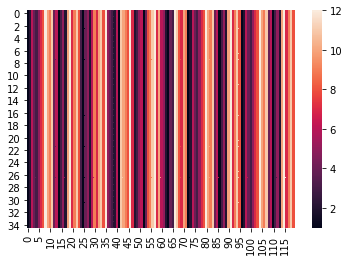

In [34]:
import seaborn as sns
sns.heatmap(col_and_rows.reshape(-1,120))

In [35]:
pred=pd.DataFrame(order_output,columns=col_and_rows.reshape(-1,120)[0].astype(int))

In [36]:
votting=[]
for i in range(pred.shape[0]):
    vot=[[] for x in range(12)]
    for x in range(12):vot[x]=0
    #print(pred.iloc[i].values)
    for x,y in zip(pred.iloc[i].values,pred.iloc[i].index):
        if x==1:vot[y-1]+=1
    votting.append(vot)
votting=pd.DataFrame(votting)

In [37]:
rows,cols=np.argmax(votting.values[:,:6],axis=1).tolist(),np.argmax(votting.values[:,6:],axis=1).tolist()

In [38]:
count,prediction=0,[]
for x,y,labels in zip(rows,cols,Ground_true[::10]):
    if P300_Result[y+7][x+1]==labels:count+=1
    print(P300_Result[y+7][x+1])
    prediction.append(P300_Result[y+7][x+1])
confusion=confusion_matrix(prediction,Ground_true[::10])\
/np.sum(confusion_matrix(prediction,Ground_true[::10]))

2
B
A
C
I
5
R
O
S
E
Z
U
P
P
A
G
A
T
T
O
M
E
N
T
E
V
I
O
L
A
R
E
B
U
S


In [39]:
test = pd.DataFrame(confusion,columns=set(Ground_true[::10]),index=set(Ground_true[::10]))

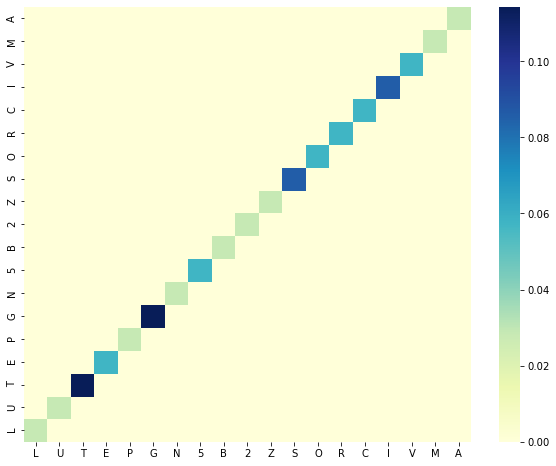

In [52]:
plt.subplots(figsize=(10,8))
sns.heatmap(test, cmap="YlGnBu").invert_yaxis()

In [41]:
np.sum(np.diag(test))

1.0

In [42]:
p300_index=np.unique(np.arange(4200)*label_index)[1:]
nop300_index=np.unique(np.arange(4200)*(1-label_index))
nop300=order_input[nop300_index].reshape(-1,10,80,8)
p300=order_input[p300_index].reshape(-1,2,80,8)

In [43]:
diff=[]
for i in range(p300.shape[0]):
    p300_signal=p300[i]
    nop300_signal=nop300[i]
    for v in range(2):
        x=np.mean(p300_signal[v]-p300_signal[v,0],axis=0)
        y=np.mean(nop300_signal[v]-nop300_signal[v,0],axis=0)
        diff.append(np.abs(x-y)[np.newaxis])
diff=np.concatenate(diff)

<AxesSubplot:>

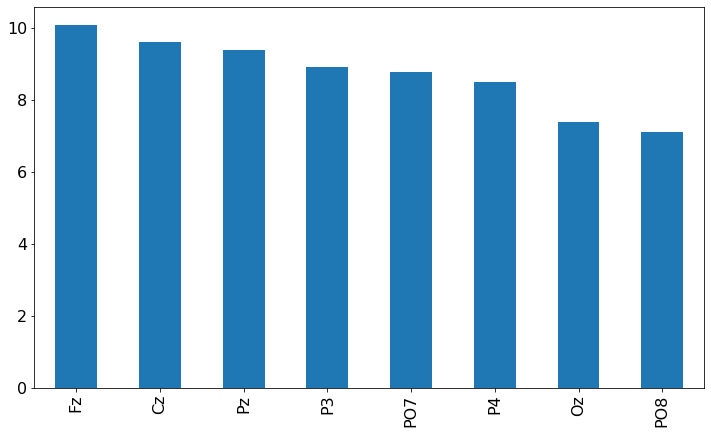

In [44]:
pd.DataFrame(np.mean(diff,axis=0),index=A01['data']['channels'].tolist().tolist(),columns=['diffe']).diffe.sort_values(ascending=False)\
.plot.bar(legend=0,figsize=(12,7),fontsize=16)

Text(0.5, 1.0, 'gs[-1, -2]')

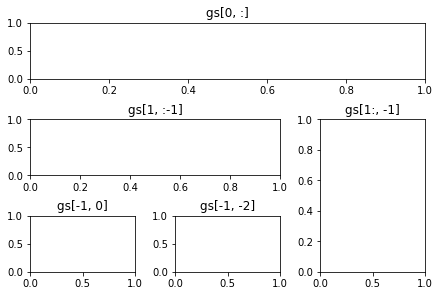

In [45]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, 1])
f3_ax5.set_title('gs[-1, -2]')

In [46]:
np.save('label_indexs',label_index)